In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import os
from tensorflow.keras import layers, models
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def load_and_preprocess_data(folder_path,label):
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path,filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(64,64))
        img = img/255.0
        images.append(img)
        labels.append(label)
    return images,labels

In [5]:
#load images apple and orange
apple_images,apple_labels=load_and_preprocess_data('/content/drive/MyDrive/train/trainA',label=0)
orange_images,orange_labels=load_and_preprocess_data('/content/drive/MyDrive/train/trainB',label=1)

In [6]:
all_images = np.concatenate([apple_images,orange_images],axis=0)
all_labels = np.concatenate([apple_labels,orange_labels],axis=0)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(all_images,all_labels,test_size = 0.2,random_state=42)

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation = 'relu',input_shape=(64,64,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(1,activation ='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [10]:
model_msk = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 375ms/step - accuracy: 0.7777 - loss: 0.4570 - val_accuracy: 0.8851 - val_loss: 0.3292
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 298ms/step - accuracy: 0.9132 - loss: 0.2471 - val_accuracy: 0.9119 - val_loss: 0.2178
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 346ms/step - accuracy: 0.9411 - loss: 0.1747 - val_accuracy: 0.9080 - val_loss: 0.2031
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step - accuracy: 0.9504 - loss: 0.1390 - val_accuracy: 0.9234 - val_loss: 0.2027
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 336ms/step - accuracy: 0.9678 - loss: 0.1076 - val_accuracy: 0.9004 - val_loss: 0.2351
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - accuracy: 0.9714 - loss: 0.1184 - val_accuracy: 0.9349 - val_loss: 0.2367
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 345ms/step - accuracy: 0.9446 - loss: 0.1412 - val_accuracy: 0.9195 - val_loss: 0.1968
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.9887 - loss: 0.0647 - val_accu

In [11]:
def preprocess_image(img):
    img = cv2.resize(img,(64,64))
    img = img/255.0
    img = np.expand_dims(img,axis=0)
    return img

In [12]:
def predict_mask(image):
    img = preprocess_image(image)
    prediction= model.predict(img)
    if prediction[0][0]<0.5:
        return "Apple"
    else:
        return "Orange"

In [82]:
image_path= '/content/drive/MyDrive/train/trainA/n07740461_10012.jpg'
image = cv2.imread(image_path)

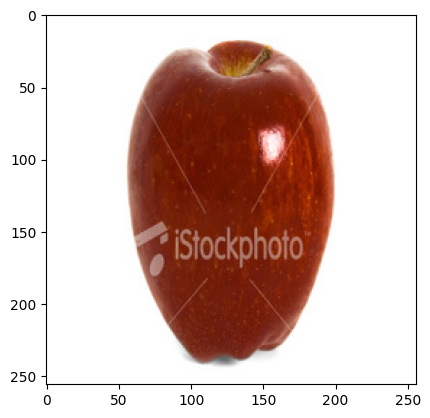

In [83]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [84]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


'Apple'

In [85]:
image_path= '/content/drive/MyDrive/train/trainB/n07749192_12249.jpg'
image = cv2.imread(image_path)

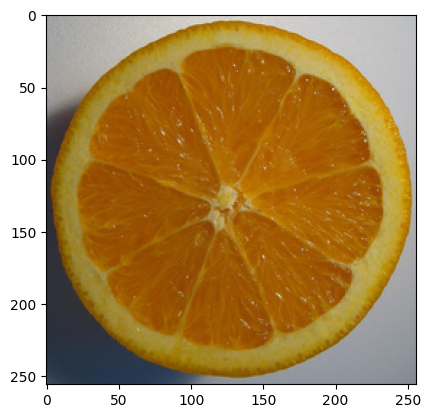

In [86]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [87]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


'Orange'

In [88]:
image_path= '/content/drive/MyDrive/train/trainB/n07749192_10096.jpg'
image = cv2.imread(image_path)

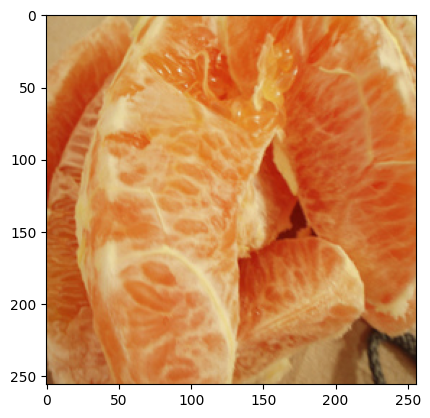

In [89]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [90]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


'Orange'

In [91]:
image_path= '/content/drive/MyDrive/train/trainA/n07740461_10239.jpg'
image = cv2.imread(image_path)

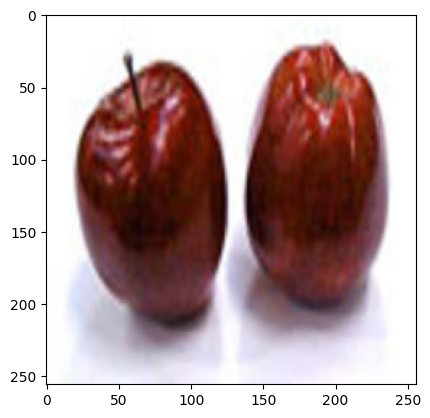

In [92]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [93]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


'Apple'

In [106]:
image_path= '/content/drive/MyDrive/train/trainA/n07740461_10657.jpg'
image = cv2.imread(image_path)

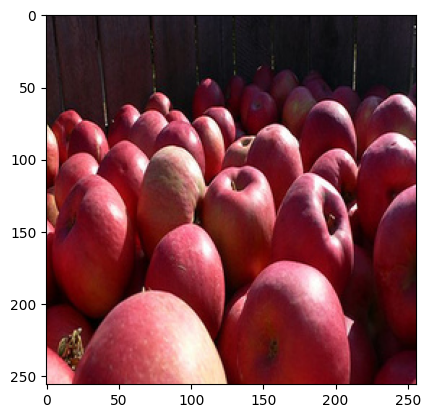

In [107]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [108]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


'Apple'

In [62]:
image_path= '/content/drive/MyDrive/train/trainB/n07749192_11719.jpg'
image = cv2.imread(image_path)

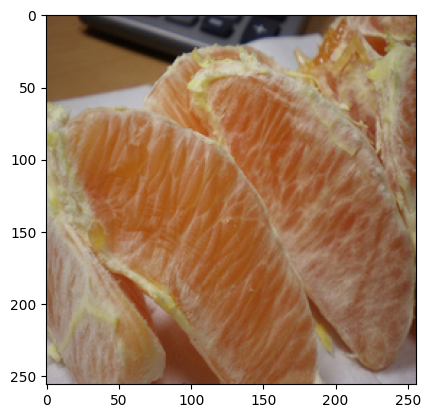

In [63]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [64]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


'Orange'

In [65]:
image_path= '/content/drive/MyDrive/train/trainA/n07740461_10643.jpg'
image = cv2.imread(image_path)

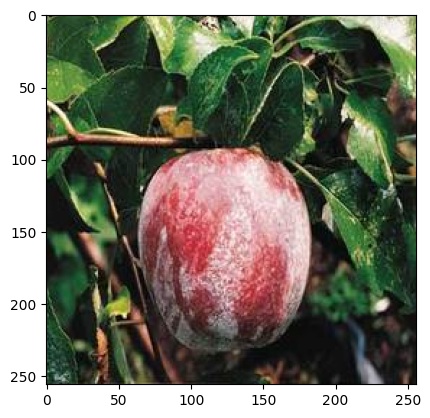

In [66]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [97]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


'Orange'

In [67]:
image_path= '/content/drive/MyDrive/train/trainA/n07740461_10797.jpg'
image = cv2.imread(image_path)

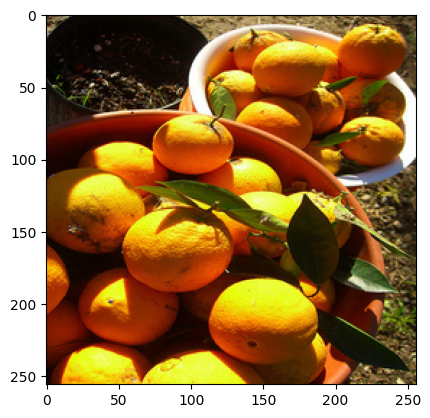

In [98]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [99]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


'Orange'

In [100]:
image_path= '/content/drive/MyDrive/train/trainA/n07740461_10539.jpg'
image = cv2.imread(image_path)

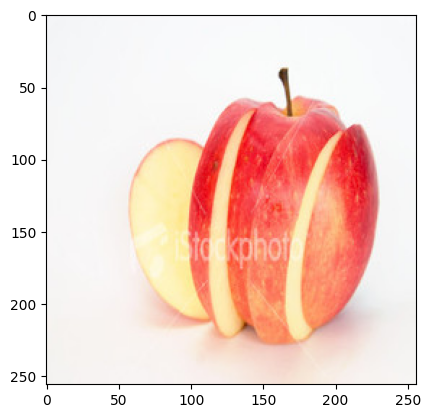

In [101]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [102]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


'Apple'

In [103]:
image_path= '/content/drive/MyDrive/train/trainB/n07749192_10275.jpg'
image = cv2.imread(image_path)

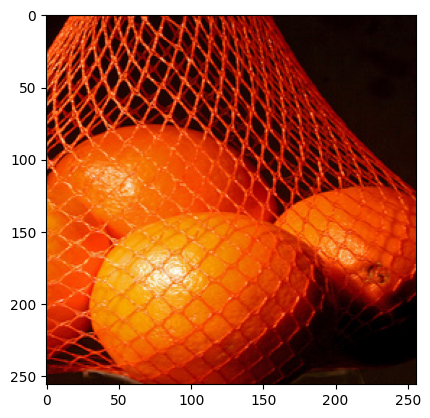

In [104]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [105]:
predict_mask(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


'Orange'